In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

c:\Users\Noite\Aulas\ml\Machine-Learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
dataset_path = '../../datasets/online_retail.xlsx'

In [3]:
df = pd.read_excel(dataset_path)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [5]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [6]:
from datetime import datetime

def format_date(date_str):
    date =  datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    return date.date()

In [7]:
# df['y'] = df['Quantity'] * df['Price']
df = df.rename(columns={'Price': 'y'})
df['ds'] = df['InvoiceDate'].apply(lambda x: format_date(str(x)))
df = df[['ds', 'y']]
df = df.groupby('ds')['y'].sum().reset_index()
df.head()

,ds,y
0,2009-12-01,14450.54
1,2009-12-02,13411.96
2,2009-12-03,13290.25
3,2009-12-04,9687.28
4,2009-12-05,1443.26


20:09:50 - cmdstanpy - INFO - Chain [1] start processing
20:09:50 - cmdstanpy - INFO - Chain [1] done processing


           Date    Actual     Predicted
22          NaN       NaN  11820.562498
23          NaN       NaN   8638.539550
24          NaN       NaN  11986.469830
25          NaN       NaN  10624.289591
26          NaN       NaN   1746.510553
27          NaN       NaN   6715.093685
28          NaN       NaN  10257.591191
29          NaN       NaN  11930.127180
30          NaN       NaN   8748.104232
31          NaN       NaN  12096.034511
297  2010-11-29  16431.74           NaN
298  2010-11-30   7914.20           NaN
299  2010-12-01  12904.25           NaN
300  2010-12-02   6815.68           NaN
301  2010-12-03  11114.09           NaN
302  2010-12-05   7893.17           NaN
303  2010-12-06  17678.78           NaN
304  2010-12-07  85152.09           NaN
305  2010-12-08   9978.06           NaN
306  2010-12-09  14662.63           NaN


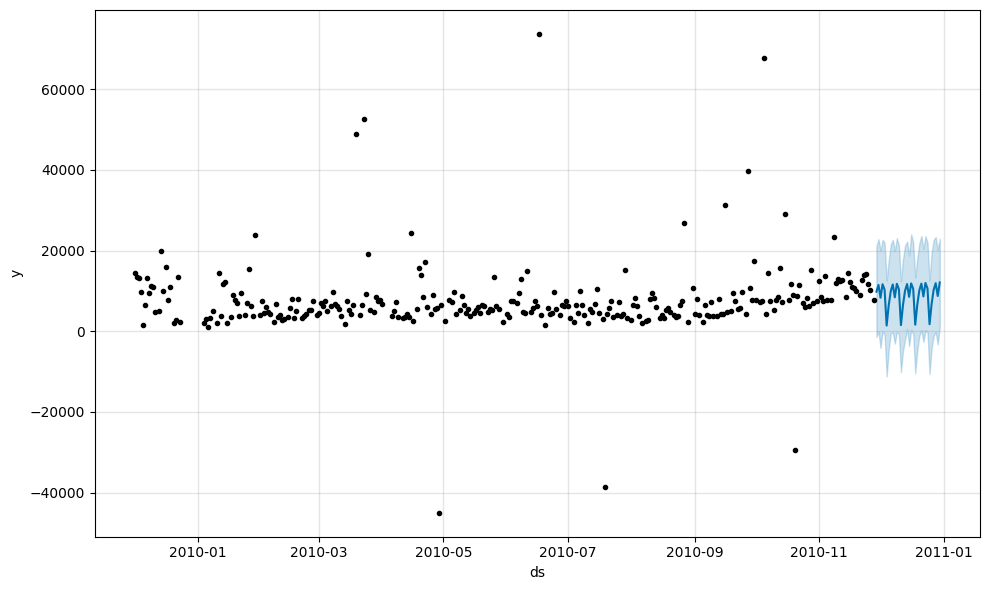

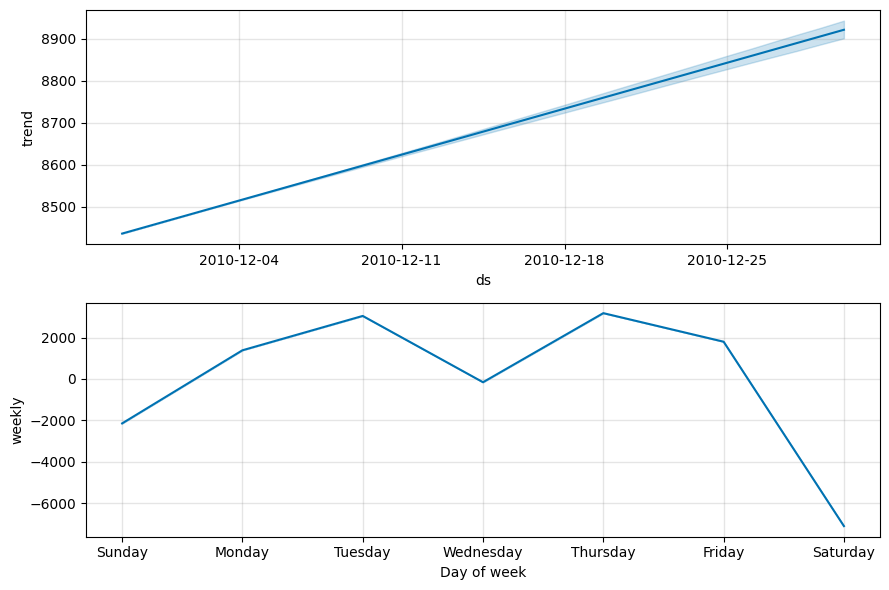

In [8]:
steps = 10

# Prepare the data for Prophet
# df = df.rename(columns={'Datetime': 'ds', 'AEP_MW': 'y'})
# df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d')

# Split the data into training and testing sets
train_data = df[:-steps]
test_data = df[-steps:]

# Initialize and train the Prophet model
model = Prophet()
model.fit(train_data)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=32, freq='D', include_history=False)

# Make predictions
forecast = model.predict(future)

# Compare predictions with actual values
comparison = pd.DataFrame({'Date': test_data['ds'], 'Actual': test_data['y'], 'Predicted': forecast['yhat'][-steps:]})

# Print the comparison dataframe
print(comparison)

# Plot the predictions
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


In [9]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error

y_true = test_data['y'].values
y_pred = forecast['yhat'][-steps:].values
# Erro médio absoluto
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# Erro médio quadrado
mse = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse)
# Raiz do erro médio quadrado
rmse = root_mean_squared_error(y_true, y_pred)
print('RMSE: %.3f' % rmse)

MAE: 10504.727
MSE: 555090494.783
RMSE: 23560.359


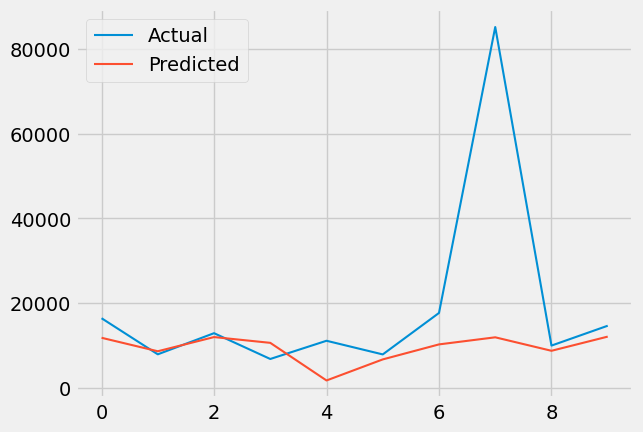

In [10]:
# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [11]:
# import joblib

In [12]:
# joblib.dump(model, 'house_price_linear_regression_model.pkl')